In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import keras 
import sklearn
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [2]:
# create data generator
samples = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    #next(reader)  # skip head for origin data, data collect manually has no head
    for line in reader:
        samples.append(line)


from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)


def generator(samples, istrain=False, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        np.random.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset: offset + batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                name = './data/IMG/' + batch_sample[0].split('\\')[-1]
                center_image = mpimg.imread(name)
                center_angle = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)
                if istrain:  # flip data left-right
                    images.append(np.fliplr(center_image)) 
                    angles.append(-1.0 * center_angle)


            # trim image to only see section with road
            X = np.array(images)
            y = np.array(angles)
            yield sklearn.utils.shuffle(X, y)

# Set our batch size
batch_size=32

# compile and train the model using the generator function
train_generator = generator(train_samples, istrain=True, batch_size=batch_size)
validation_generator = generator(validation_samples, batch_size=batch_size)


In [3]:
# build model
model = keras.models.Sequential([
    keras.layers.Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)),
    keras.layers.Cropping2D(((70, 25), (0, 0))),
    Conv2D(8, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(32),  
    Dropout(0.5),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

history = model.fit_generator(train_generator, 
            steps_per_epoch=math.ceil(len(train_samples)/batch_size), 
            validation_data=validation_generator, 
            validation_steps=math.ceil(len(validation_samples)/batch_size), 
            epochs=3, verbose=1)

model.save('model.h5')

Epoch 1/3
283/283 [==============================] - 198s 701ms/step - loss: 0.0564 - val_loss: 0.0029
Epoch 2/3
283/283 [==============================] - 196s 692ms/step - loss: 0.0388 - val_loss: 0.0039
Epoch 3/3
283/283 [==============================] - 194s 685ms/step - loss: 0.0368 - val_loss: 0.0339


dict_keys(['val_loss', 'loss'])


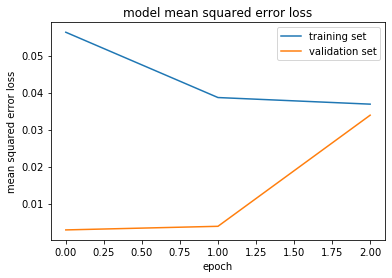

In [4]:
# print the keys contained in the history object
print(history.history.keys())

# plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [5]:
# cd C:/Users/sun99/jupyternotebook/Self-Driving-Car/CarND-Behavioral-Cloning-P3/ && python drive.py model.h5

In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import keras 
import sklearn
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = keras.models.Sequential([
    keras.layers.Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)),
    keras.layers.Cropping2D(((70, 25), (0, 0))),
    Conv2D(8, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(32),  
    Dropout(0.5),
    Dense(1)
])

C:\Users\sun99\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sun99\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 65, 320, 8)        224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 160, 8)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 160, 16)       1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 80, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 80, 32)       

In [5]:
# create data generator
samples = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip head for origin data, data collect manually has no head
    for line in reader:
        samples.append(line)

In [6]:
len(samples)

11284

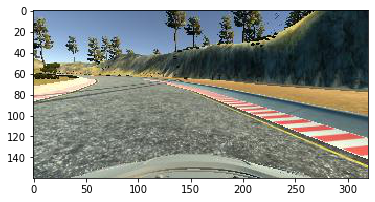

In [7]:
img = mpimg.imread("examples/center.jpg")
plt.imshow(img)

In [10]:
flipped_img = np.fliplr(img)

In [13]:
mpimg.imsave('examples/center_fliplr.jpg', flipped_img)